In [1]:
import torch
import numpy as np
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import pandas as pd
from PIL import Image
import os
import copy

In [85]:
LABELS_Severity = {35: 0,
                   43: 0,
                   47: 1,
                   53: 1,
                   61: 2,
                   65: 2,
                   71: 2,
                   85: 2}

mean = (.1706)
std = (.2112)
normalize = transforms.Normalize(mean=mean, std=std)

transform_resnet = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3), # to compatible with resnet
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform_augment = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(degrees=(-15, -15)),
    #transforms.GaussianBlur(kernel_size=(5, 5)),
    transforms.ColorJitter(contrast=(0.5, 0.5)),
    transforms.ToTensor(),
    normalize,
    transforms.ToPILImage()
])

transform = transforms.Compose([
    transforms.Resize(size=(224,224)),
    transforms.ToTensor(),
    #transforms.ColorJitter(contrast=(0.5, 0.5)),
    normalize,
    transforms.ToPILImage()
])

In [26]:

data_root = '/storage/home/hpaceice1/shared-classes/materials/ece8803fml/'
annot_train_prime = 'df_prime_train_features.csv'

annot = pd.read_csv(annot_train_prime)

label = [LABELS_Severity[drss] for drss in copy.deepcopy(annot['DRSS'].values)] 
path_list = annot['Volume_ID'].values
print(label[25])

0


/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-038/W32/OS/0.tif
0


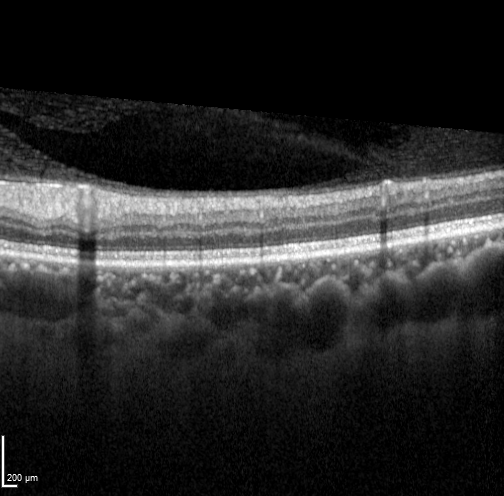

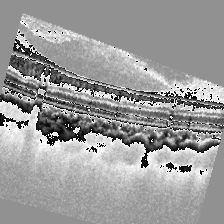

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W48/OD/0.tif
1


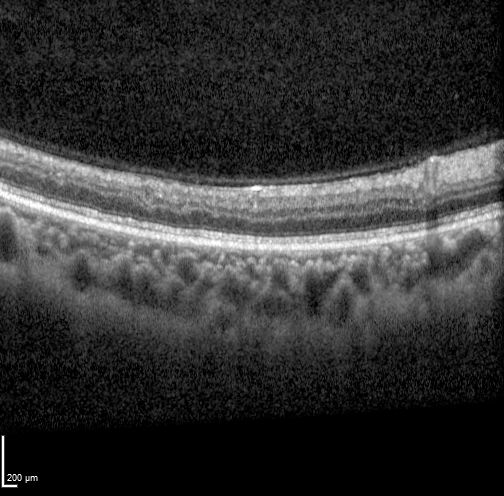

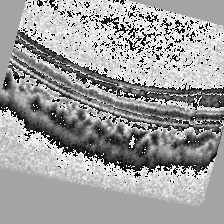

/storage/home/hpaceice1/shared-classes/materials/ece8803fml//Prime_FULL/01-048/W0/OD/0.tif
2


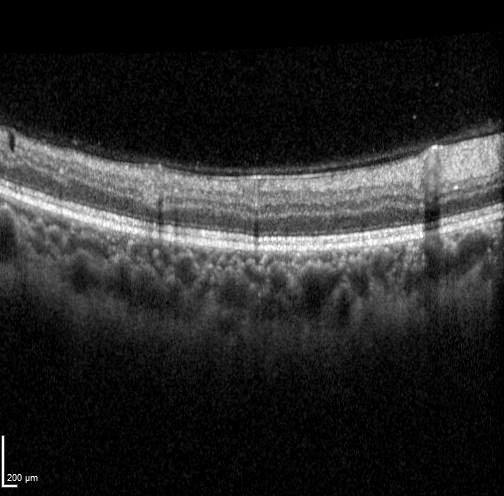

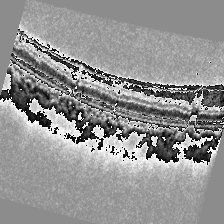

In [86]:
index = 25
folder_path = data_root + path_list[index]
for i  in range(0, 1):
    tif = str(i) + '.tif'
    png = str(i) + '.png'

    print(os.path.join(folder_path, tif))
    print(label[index])
    if (os.path.isfile(os.path.join(folder_path, tif))):
       img = Image.open(os.path.join(folder_path, tif)).convert("L")
    elif (os.path.isfile(os.path.join(folder_path, png))):
       img = Image.open(os.path.join(folder_path, png)).convert("L")
    
    display(img)
    img = transform_augment(img)
    display(img)

index = 0
folder_path = data_root + path_list[index]
for i  in range(0, 1):
    tif = str(i) + '.tif'
    png = str(i) + '.png'

    print(os.path.join(folder_path, tif))
    print(label[index])
    if (os.path.isfile(os.path.join(folder_path, tif))):
       img = Image.open(os.path.join(folder_path, tif)).convert("L")
    elif (os.path.isfile(os.path.join(folder_path, png))):
       img = Image.open(os.path.join(folder_path, png)).convert("L")
    
    display(img)
    img = transform_augment(img)
    display(img)

index = 2
folder_path = data_root + path_list[index]  
for i  in range(0, 1):
    tif = str(i) + '.tif'
    png = str(i) + '.png'

    print(os.path.join(folder_path, tif))
    print(label[index])
    if (os.path.isfile(os.path.join(folder_path, tif))):
       img = Image.open(os.path.join(folder_path, tif)).convert("L")
    elif (os.path.isfile(os.path.join(folder_path, png))):
       img = Image.open(os.path.join(folder_path, png)).convert("L")
    
    display(img)
    img = transform_augment(img)
    display(img)